# PROJECT : Automobile Price Regression

<p style='color:Red;font-style:Bold'> NOTE : This project is best viewed in web docs due to use of plotly visualizations.</p>

## Loading Data

References -

https://archive.ics.uci.edu/ml/machine-learning-databases/autos/

https://archive.ics.uci.edu/ml/datasets/Automobile

## Data Guide

This data set consists of three types of entities: 

(a) the specification of an auto in terms of various characteristics, 

(b) its assigned insurance risk rating, 

(c) its normalized losses in use as compared to other cars.  The second rating corresponds to them degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale.  Actuarians call this process "symboling".  A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year.  
This value is normalized for all autos within a particular size classification (two-door small, station wagons,sports/speciality, etc...), and represents the average loss per car per year.


| Attribute |                Attribute Range |          Description                  |
| ------------------ | ----------------------------------------------- | ----------- |
| symboling             |    -3, -2, -1, 0, 1, 2, 3.| level of risk -3 is safest and +3 is very risky. |
| normalized-losses     |    continuous from 65 to 256.|  |
| make                  |    alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo |  Company. | 
| fuel-type             |    diesel, gas.| type of fuel |
| aspiration            |    std, turbo.|  |
| num-of-doors          |    four, two.| number of doors |
| body-style            |    hardtop, wagon, sedan, hatchback, convertible.| type of car body. |
| drive-wheels          |    4wd, fwd, rwd.|  |
| engine-location       |    front, rear.| engine location. |
| wheel-base            |     continuous from 86.6 120.9.|  |
| length                |     continuous from 141.1 to 208.1.|  |
| width                 |     continuous from 60.3 to 72.3.|  |
| height                |     continuous from 47.8 to 59.8.|  |
| curb-weight           |     continuous from 1488 to 4066.|  |
| engine-type           |     dohc, dohcv, l, ohc, ohcf, ohcv, rotor.|  |
| num-of-cylinders      |     eight, five, four, six, three, twelve, two.| number of cylinders in engine. |
| engine-size           |     continuous from 61 to 326.|  |
| fuel-system           |     1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.|  |
| bore                  |     continuous from 2.54 to 3.94.|  |
| stroke                |     continuous from 2.07 to 4.17.|  |
| compression-ratio     |     continuous from 7 to 23.|  |
| horsepower            |     continuous from 48 to 288.|  |
| peak-rpm              |     continuous from 4150 to 6600.|  |
| city-mpg              |     continuous from 13 to 49.|  |
| highway-mpg           |     continuous from 16 to 54.|  |
| price                 |     continuous from 5118 to 45400. |  |

In [44]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.graph_objects as go

pio.renderers.default = 'notebook_connected'

%matplotlib inline


In [2]:
features = [
    'symboling',
    'normalized_losses',
    'make',
    'fuel_type',
    'aspiration',
    'num_of_doors',
    'body_style',
    'drive_wheels',
    'engine_location',
    'wheel_base',
    'length',
    'width',
    'height',
    'curb_weight',
    'engine_type',
    'num_of_cylinders',
    'engine_size',
    'fuel_system',
    'bore',
    'stroke',
    'compression_ratio',
    'horsepower',
    'peak_rpm',
    'city_mpg',
    'highway_mpg'
]
target = ['price']

columns = features + target


In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",\
        header = None)
df.columns = columns

df.head(3)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [4]:
df.shape

(205, 26)

`Data is very less`

? instead of None or NaN, fixing it

In [5]:
df.replace('?', np.NaN, inplace=True)

df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Fixing data types

In [6]:
df['price'] = df['price'].apply(float)
df['normalized_losses'] = df['normalized_losses'].apply(float)
df['bore'] = df['bore'].apply(float)
df['stroke'] = df['stroke'].apply(float)
df['horsepower'] = df['horsepower'].apply(float)
df['peak_rpm'] = df['peak_rpm'].apply(float)

## Fixing nulls

In [7]:
df = df[df['price'].notna()]

print(df.shape)

(201, 26)


In [8]:
df.isna().sum()

symboling             0
normalized_losses    37
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [9]:
df['normalized_losses'].fillna(df['normalized_losses'].mean(), inplace=True)

In [10]:
df.dropna(inplace=True)

In [11]:
df.isna().sum()


symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [12]:
df.shape

(193, 26)

## Distribution plots

In [13]:
from graphpkg.static import multi_distplots

In [14]:
plt.rcParams.update({
    'font.size': 12,
    'font.style': 'oblique'
})

### All distrbutions at once

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


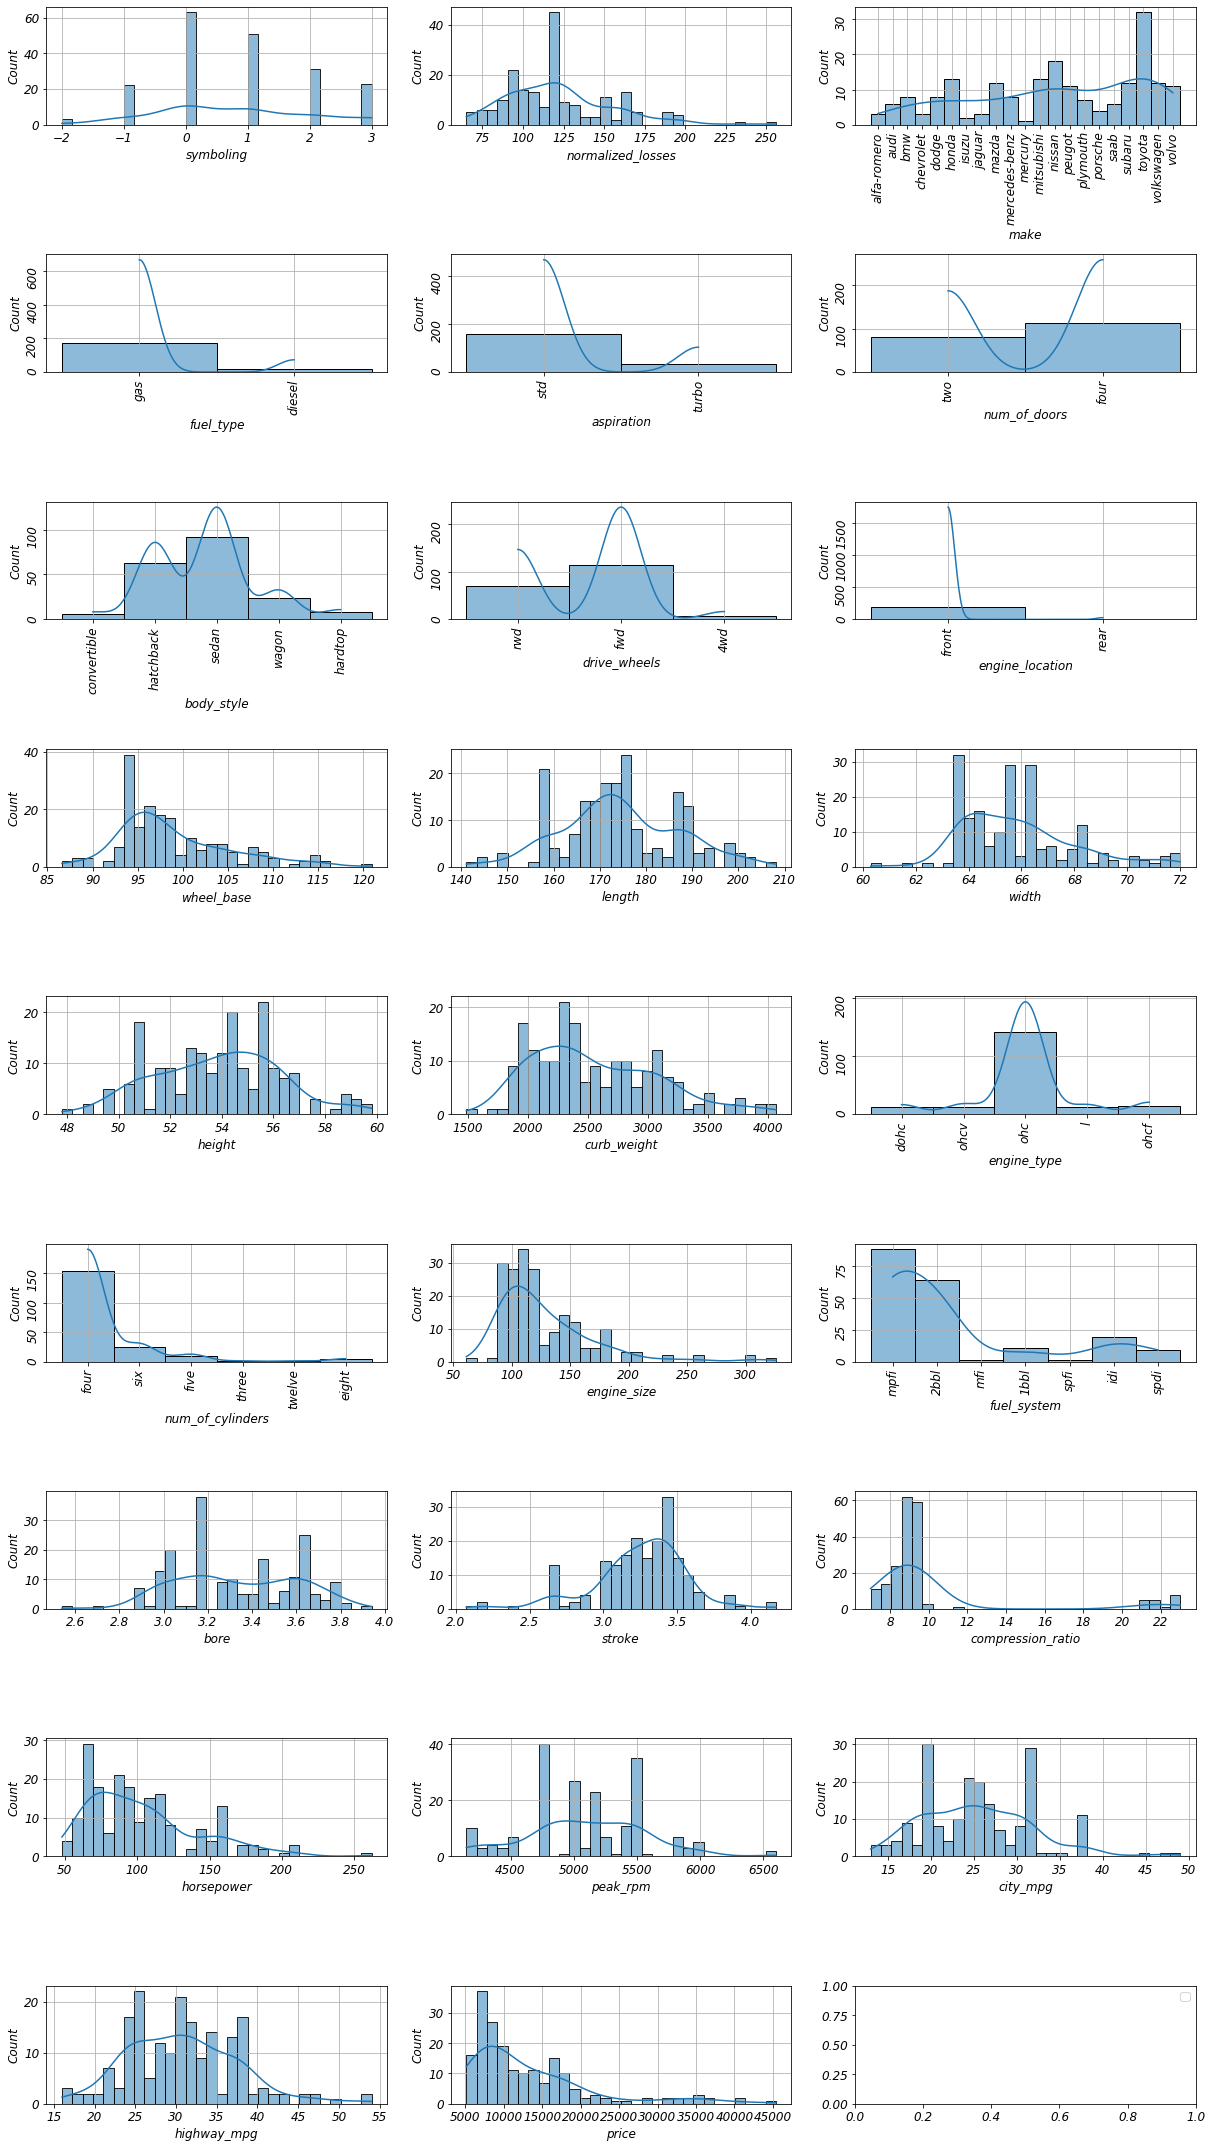

In [15]:
multi_distplots(df=df, n_cols=3, bins=30, figsize=(17,30), xticks_rotation=90)
plt.show()

### make with symboling

In [45]:
fig = px.histogram(df.sort_values(by='symboling',ascending=True), x="make", color='symboling')
fig.show()

### price distribution

In [71]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(y=df["price"], mode='lines+markers'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(y=df["price"]),
    row=1, col=2
)

fig.add_hline(df["price"].mean())
fig.add_hline(df["price"].median())

fig.show()


In [17]:
fig = px.histogram(df, x="price", nbins=30, marginal='box')
fig.show()

### price with symboling

In [18]:
fig = px.histogram(df, x="price", nbins=30, color='symboling',marginal="box")
fig.show()


### price with make

In [19]:
fig = px.histogram(df, x="price", nbins=30, color='make',marginal="box", height=600)
fig.show()

### price with fuel_type

In [20]:
fig = px.histogram(df, x="price", nbins=30, color='fuel_type',marginal="box")
fig.show()

### price with aspiration

In [21]:
fig = px.histogram(df, x="price", nbins=30, color='aspiration',marginal="box")
fig.show()

### price with num_of_doors

In [22]:
fig = px.histogram(df, x="price", nbins=30, color='num_of_doors')
fig.show()

### price with body_style

In [23]:
fig = px.histogram(df, x="price", nbins=30, color='body_style',marginal="box")
fig.show()


### price with drive_wheels

In [24]:
fig = px.histogram(df, x="price", nbins=30, color='drive_wheels',marginal="box")
fig.show()


### price with engine_location

In [25]:
fig = px.histogram(df, x="price", nbins=30, color='engine_location')
fig.show()

### price with engine_type

In [26]:
fig = px.histogram(df, x="price", nbins=30, color='engine_type',marginal="box")
fig.show()


### price with num_of_cylinders

In [27]:
fig = px.histogram(df, x="price", nbins=30, color='num_of_cylinders',marginal="box")
fig.show()


### price with fuel_system

In [28]:
fig = px.histogram(df, x="price", nbins=30, color='fuel_system',marginal="box")
fig.show()


## Correlation plots

In [29]:
float_columns = [i[0] for i in df.dtypes.iteritems() if str(i[1])
                 in ('float64', 'int64')]

In [42]:
fig = px.imshow(df[float_columns].corr(method='pearson'),
                text_auto=".2f", zmin=-1, zmax=1, aspect="auto", color_continuous_scale='rdylbu')
fig.show()
